# Numerical Partial Differential Equation II: Stability Analysis

## Numerical Methods for the Advection Equation

In the previous section, we explored the **Forward Time Centered Space (FTCS)** scheme, a fundamental explicit finite difference method for solving the linear advection equation:
\begin{align}
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
\end{align}

The FTCS scheme approximates the time derivative using a forward difference and the spatial derivatives using centered differences.
\begin{align}
u_i^{n+1} = u_i^n - \frac{c \Delta t}{2 \Delta x} \left( u_{i+1}^n - u_{i-1}^n \right)
\end{align}

While straightforward to implement, the FTCS method is unconditionally unstable.
We also provided some Python code to demonstrate the application of the FTCS scheme to a sinusoidal initial condition:

Courant number (sigma): 0.1


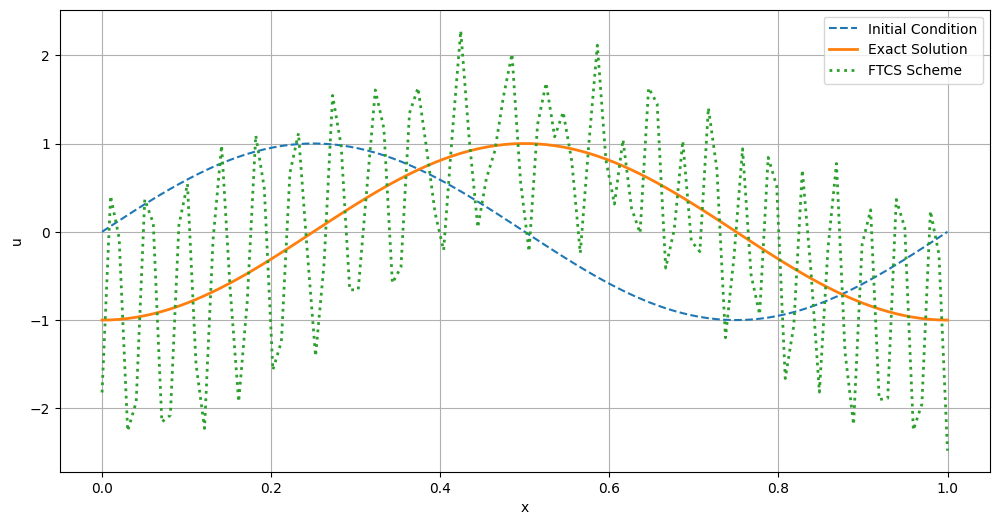

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 1.0          # Advection speed
L = 1.0          # Domain length
T = 1.25         # Total time
nx = 100         # Number of spatial points
dx = L / nx      # Spatial step size
dt = 0.001       # Initial time step size
nt = int(T / dt) # Number of time steps

# Stability parameter
sigma = c * dt / dx
print(f"Courant number (sigma): {sigma}")

# Spatial grid
x = np.linspace(0, L, nx)
u_initial = np.sin(2 * np.pi * x)  # Initial condition: sinusoidal wave

# Initialize solution array
u = u_initial.copy()

# Time-stepping loop
for n in range(nt):
    # Apply periodic boundary conditions using np.roll
    u_new = u - (c * dt / (2 * dx)) * (np.roll(u, -1) - np.roll(u, 1))
    u = u_new

# Analytical solution
u_exact = np.sin(2 * np.pi * (x - c * T))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(x, u_initial, label='Initial Condition', linestyle='--')
plt.plot(x, u_exact,   label='Exact Solution', linewidth=2)
plt.plot(x, u,         label='FTCS Scheme', linestyle=':', linewidth=2)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)

The simulation results illustrate how the FTCS scheme evolves the initial sinusoidal wave over time.
However, due to its unconditional stability, numerical instability always occur.

To overcome the limitations of the FTCS scheme, we introduce two more robust finite difference methods:
the Upwind Scheme and the Lax-Wendroff Scheme.
These methods enhance stability and accuracy, making them more suitable for solving advection-dominated problems.

### Upwind Scheme

The **Upwind Scheme** is a finite difference method specifically designed to handle advection-dominated problems more effectively than symmetric schemes like FTCS.
By incorporating the direction of wave propagation into the discretization of spatial derivatives, the upwind method enhances numerical stability and reduces non-physical oscillations.

In advection processes, information propagates in a specific direction determined by the flow velocity $c$.
The upwind scheme leverages this directional information to bias the spatial derivative approximation, ensuring that the numerical flux aligns with the physical transport direction.
This directional bias significantly improves the stability of the numerical solution, especially when dealing with sharp gradients or discontinuities.

The upwind scheme discretizes the spatial derivative based on the sign of the advection speed $c$:
*  **For $c > 0$** (flow to the right):
   \begin{align}
   \frac{\partial u}{\partial x} \approx \frac{u_i^n - u_{i-1}^n}{\Delta x}
   \end{align}
*  **For $c < 0$** (flow to the left):
   \begin{align}
   \frac{\partial u}{\partial x} \approx \frac{u_{i+1}^n - u_i^n}{\Delta x}
   \end{align}

Assuming $c > 0$ for this implementation, the **Upwind Scheme** update rule becomes:
\begin{align}
u_i^{n+1} = u_i^n - \frac{c \Delta t}{\Delta x} \left( u_i^n - u_{i-1}^n \right)
\end{align}
where:
* $u_i^n$ is the numerical approximation of $u$ at spatial index $i$ and time level $n$,
* $\Delta t$ and $\Delta x$ are the time and spatial step sizes, respectively.

The following Python code implements the upwind scheme to solve the linear advection equation for a sinusoidal initial condition.

Courant number (sigma): 0.1


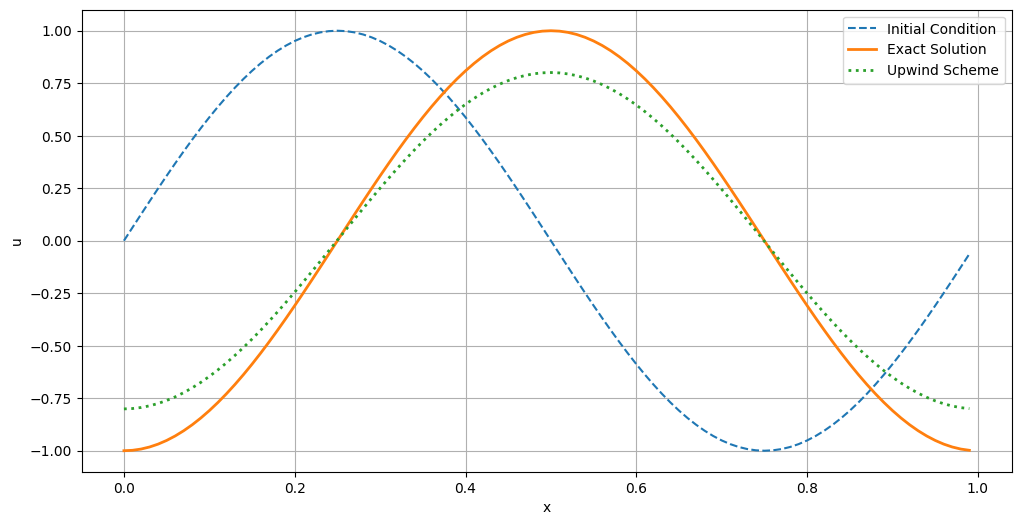

In [2]:
import warnings

# Parameters
c = 1.0          # Advection speed
L = 1.0          # Domain length
T = 1.25         # Total time
nx = 100         # Number of spatial points
dx = L / nx      # Spatial step size
dt = 0.001       # Initial time step size
nt = int(T / dt) # Number of time steps

# Stability parameter
sigma = c * dt / dx
print(f"Courant number (sigma): {sigma}")

# Check CFL condition
if sigma > 1:
    warnings.warn(f"CFL condition violated: sigma = {sigma} > 1. Please reduce dt or increase dx.")

# Spatial grid
x = np.linspace(0, L, nx, endpoint=False)
u_initial = np.sin(2 * np.pi * x)  # Initial condition: sinusoidal wave

# Initialize solution array
u = u_initial.copy()

# Time-stepping loop using Upwind scheme
for n in range(nt):
    # Apply periodic boundary conditions using np.roll
    u_new = u - sigma * (u - np.roll(u, 1))
    u = u_new

# Analytical solution
u_exact = np.sin(2 * np.pi * (x - c * T))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(x, u_initial, label='Initial Condition', linestyle='--')
plt.plot(x, u_exact,   label='Exact Solution', linewidth=2)
plt.plot(x, u,         label='Upwind Scheme', linestyle=':', linewidth=2)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)

### Von Neumann Stability Analysis

Von Neumann Stability Analysis assesses the stability of numerical schemes by examining how Fourier modes are amplified or damped during the simulation.

Assume the numerical solution can be expressed as:
\begin{align}
u_i^n = G^n e^{ikx_i}
\end{align}
where:
* $G$ is the **amplification factor**,
* $k$ is the wave number,
* $x_i = i \Delta x$.

Substitute $u_i^n = G^n e^{ikx_i}$ into the upwind update equation:
\begin{align}
G^{n+1} e^{ikx_i} = G^n e^{ikx_i} - \sigma \left( G^n e^{ikx_i} - G^n e^{ikx_{i-1}} \right)
\end{align}

Divide both sides by $G^n e^{ikx_i}$:
\begin{align}
G = 1 - \sigma \left( 1 - e^{-ik\Delta x} \right)
\end{align}

Using Euler's formula and separate the real and imaginary parts:
\begin{align}
G = (1 - \sigma + \sigma \cos(k\Delta x)) - i \sigma \sin(k\Delta x)
\end{align}

For stability, the magnitude of the amplification factor must satisfy $|G| \leq 1$.

Calculate $|G|^2$:
\begin{align}
|G|^2
&= (1 - \sigma + \sigma \cos(k\Delta x))^2 + (\sigma \sin(k\Delta x))^2 \\
&= (1 - \sigma)^2 + 2\sigma(1 - \sigma)\cos(k\Delta x) + \sigma^2 \cos^2(k\Delta x) + \sigma^2 \sin^2(k\Delta x)
\end{align}
Using $\cos^2(\theta) + \sin^2(\theta) = 1$:
\begin{align}
|G|^2 = 1 - 2\sigma + 2\sigma^2 + 2\sigma(1 - \sigma)\cos(k\Delta x)
\end{align}

To find the maximum $|G|$, consider $\cos(k\Delta x) = -1$ so that
\begin{align}
|G|^2_{\text{max}} = (1 - 2\sigma)^2
\end{align}

For stability, we require $|G| \leq 1$.
This yields two inequalities $0 \leq \sigma \leq 1$.
This implies that the **Upwind Scheme** is **stable** provided that the Courant number satisfies:
\begin{align}
\sigma = \frac{c \Delta t}{\Delta x} \leq 1.
\end{align}

### Modified Equation Analysis

While Von Neumann Stability Analysis provides insights into the stability of numerical schemes, **Modified Equation Analysis** delves deeper by examining the leading-order truncation errors introduced by discretization.
This analysis reveals how numerical schemes can inadvertently introduce artificial diffusion or dispersion into the solution.

To determine how the Upwind Scheme modifies the original advection equation by introducing additional terms that represent numerical errors.

1. **Express the Upwind Scheme Using Taylor Series Expansions**

   Start with the upwind update equation:
   \begin{align}
   u_i^{n+1} = u_i^n - \sigma \left( u_i^n - u_{i-1}^n \right),
   \end{align}
   in addition to the grid point that we want to update, $u_i^n$, there are two additional grid points.
   They are $u_i^{n+1}$ and $u_{i-1}^n$.

   Expand $u_i^{n+1}$ and $u_{i-1}^n$ around the point $(x_i, t^n)$ using Taylor series:
   \begin{align}
   u_i^{n+1} &= u(x_i, t^n) + \Delta t \left.\frac{\partial u}{\partial t}\right|_{x=x_i,t=t_n} + \frac{\Delta t^2}{2} \left.\frac{\partial^2 u}{\partial t^2}\right|_{x=x_i,t=t_n} + \mathcal{O}(\Delta t^3) \\
   u_{i-1}^n &= u(x_i, t^n) - \Delta x \left.\frac{\partial u}{\partial x}\right|_{x=x_i,t=t_n} + \frac{\Delta x^2}{2} \left.\frac{\partial^2 u}{\partial x^2}\right|_{x=x_i,t=t_n} + \mathcal{O}(\Delta x^3)
   \end{align}

   Using the shorthands $\dot{u} \equiv \partial u/\partial t$ and $u' \equiv \partial u/partial x$, the above series can be written as
   \begin{align}
   u_i^{n+1} &= u_i^n + \Delta t\,\dot{u}_i^n + \frac{\Delta t^2}{2}\,\ddot{u}_i^n + \mathcal{O}(\Delta t^3) \\
   u_{i-1}^n &= u_i^n - \Delta x\,{u'   }_i^n + \frac{\Delta x^2}{2}\,{u''   }_i^n + \mathcal{O}(\Delta x^3)
   \end{align}

2. **Substitute the Taylor Expansions into the Upwind Scheme**

   Substitute the expansions into the upwind update equation:
   \begin{align}
   u_i^n + \Delta t\,\dot{u}_i^n + \frac{\Delta t^2}{2}\,\ddot{u}_i^n = u_i^n - \sigma \left[ u_i^n - \left( u_i^n - \Delta x\,{u'}_i^n + \frac{\Delta x^2}{2}\,{u''}_i^n \right) \right]
   \end{align}

   Because the derivatives are exact (instead of numerical), we can drop the functions' evaluations at the dicrete points $x_i$ and $t_n$. Simplify the equation, we have:
   \begin{align}
   \Delta t \frac{\partial u}{\partial t} + \frac{\Delta t^2}{2} \frac{\partial^2 u}{\partial t^2} = -\sigma \left( \Delta x \frac{\partial u}{\partial x} - \frac{\Delta x^2}{2} \frac{\partial^2 u}{\partial x^2} \right)
   \end{align}

3. **Rearrange and Substitute the Original PDE**

   Taking the spatial and temporal derivatives of the original advection equation $\partial u/\partial t = -c \partial u/\partial x$, we have
   \begin{align}
   \frac{\partial^2 u}{\partial t^2} = -c \frac{\partial^2 u}{\partial x\partial t}, \quad
   \frac{\partial^2 u}{\partial t\partial x} = -c \frac{\partial^2 u}{\partial x^2}
   \end{align}
   Combine, we obtain the two-way wave equation:
   \begin{align}
   \frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}.
   \end{align}

   Substituting the wave equation into the modified equation, we obtain:
   \begin{align}
   \Delta t \frac{\partial u}{\partial t} + \frac{c^2\Delta t^2}{2} \frac{\partial^2 u}{\partial x^2}
   = -\sigma \left( \Delta x \frac{\partial u}{\partial x} - \frac{\Delta x^2}{2} \frac{\partial^2 u}{\partial x^2} \right).
   \end{align}

4. **Combine Like Terms**

   Put back the definition of $\sigma$ and rearrange,
   \begin{align}
   \frac{\partial u}{\partial t} + \frac{c^2\Delta t}{2} \frac{\partial^2 u}{\partial x^2}
   &= -c \left( \frac{\partial u}{\partial x} - \frac{\Delta x}{2} \frac{\partial^2 u}{\partial x^2} \right) \\
   \frac{\partial u}{\partial t} +c \frac{\partial u}{\partial x}
   &= \frac{c}{2} (\Delta x - c\Delta t) \frac{\partial^2 u}{\partial x^2}
   \end{align}

   Define $\nu_\text{upwind} \equiv (\Delta x - c\Delta t) c / 2$ be the **numerical diffusion coefficient**, the above equation reduces to
   \begin{align}
   \frac{\partial u}{\partial t} +c \frac{\partial u}{\partial x} = \nu_\text{upwind} \frac{\partial^2 u}{\partial x^2}.
   \end{align}

The **Modified Equation Analysis** reveals that the Upwind Scheme introduces an artificial diffusion term proportional to $\Delta x - c \Delta t$.
This numerical diffusion acts to smooth out sharp gradients in the solution, which can be beneficial in suppressing non-physical oscillations that may arise from discretization errors.
By damping these oscillations, the scheme enhances the overall stability of the numerical solution, ensuring that the simulation remains free from erratic and unrealistic fluctuations.

However, this introduction of numerical diffusion comes with a trade-off in accuracy.
While the diffusion helps stabilize the solution, it also has the unintended effect of smearing out important features such as sharp interfaces or discontinuities within the advected quantity $u$.
This attenuation can lead to a loss of fidelity in capturing precise wavefronts or shock formations, which are critical in accurately modeling phenomena like shock waves in fluid dynamics.
Consequently, while the Upwind Scheme mitigates instability, it may compromise the sharpness and detail of the solution where high accuracy is required.

Furthermore, the Modified Equation Analysis reinforces the critical importance of adhering to the Courant-Friedrichs-Lewy (CFL) condition $\sigma \leq 1$.
Satisfying this condition is not only essential for maintaining the stability of the numerical scheme but also plays a pivotal role in controlling the extent of artificial diffusion introduced by the Upwind Scheme.
When the CFL condition is violated ($\sigma > 1$), not only does the numerical scheme become unstable, leading to divergent and oscillatory solutions, but the altered modified equation exacerbates the artificial diffusion.
This excessive diffusion further degrades the solution quality, making it increasingly inaccurate and unreliable.
Therefore, ensuring that the CFL condition is satisfied is paramount in balancing stability and accuracy, enabling the Upwind Scheme to perform optimally without introducing significant numerical artifacts.

## Modified Equation Analysis for the FTCS Scheme

We performed the **Von Neumann Stability Analysis** last lecture, highlighting the instability of the FTCS scheme for the linear advection equation.
**Modified Equation Analysis** provides further insights into the nature of the errors introduced by the numerical discretization, revealing how these errors affect the accuracy and stability of the numerical solution.

To determine how the **Forward Time Centered Space (FTCS)** scheme modifies the original linear advection equation by introducing additional terms that represent numerical errors, specifically focusing on artificial diffusion or dispersion.

1. **Start with the FTCS Update Equation**

   Recalling the FTCS scheme for the linear advection equation is given by:
   \begin{align}
   u_i^{n+1} = u_i^n - \frac{c \Delta t}{2 \Delta x} \left( u_{i+1}^n - u_{i-1}^n \right)
   \end{align}
   where:
   * $u_i^n$ is the numerical approximation of $u$ at spatial index $i$ and time level $n$,
   * $c$ is the constant advection speed,
   * $\Delta t$ and $\Delta x$ are the time and spatial step sizes, respectively,
   * $\sigma = c \Delta t/\Delta x$ is the **Courant number**.

2. **Expand the Temporal and Spatial Terms Using Taylor Series**

   Expand $u_i^{n+1}$ around $(x_i, t^n)$:
   \begin{align}
   u_i^{n+1} = u_i^n + \Delta t \dot{u}_i^n + \frac{\Delta t^2}{2} \ddot{u}_i^n + \frac{\Delta t^3}{6} {\dddot{u}\,}_i^n + \mathcal{O}(\Delta t^3)
   \end{align}

   Expand $u_{i+1}^n$ and $u_{i-1}^n$ around $(x_i, t^n)$:
   \begin{align}
   u_{i\pm1}^n &= u_i^n \pm \Delta x {u'}_i^n + \frac{\Delta x^2}{2} {u''}_i^n \pm \frac{\Delta x^3}{6} {u'''}_i^n + \mathcal{O}(\Delta x^4)
   \end{align}

3. **Substitute the Taylor Expansions into the FTCS Scheme**

   Substitute the expansions into the FTCS update equation:
   \begin{align}
   u_i^n &+ \Delta t \dot{u}_i^n + \frac{\Delta t^2}{2} \ddot{u}_i^n + \frac{\Delta t^3}{6} {\dddot{u}\,}_i^n \\
   &= u_i^n - \frac{c \Delta t}{2 \Delta x} \left[
     \left( u_i^n + \Delta x {u'}_i^n + \frac{\Delta x^2}{2} {u''}_i^n + \frac{\Delta x^3}{6} {u'''}_i^n \right) -
     \left( u_i^n - \Delta x {u'}_i^n + \frac{\Delta x^2}{2} {u''}_i^n - \frac{\Delta x^3}{6} {u'''}_i^n \right)
   \right]
   \end{align}
   Simplify,
   \begin{align}
   \dot{u}_i^n + \frac{\Delta t}{2}\ddot{u}_i^n + \frac{\Delta t^2}{6} {\dddot{u}\,}_i^n
   &= - c\left[ {u'}_i^n + \frac{\Delta x^2}{6} {u'''}_i^n \right]
   \end{align}

4. **Substitute and Rearrange**

   Similar to the upwind screen, we recall that the advection equation implies the wave equation $\partial^2 u/\partial t^2 = c^2 \partial^2 u/\partial x^2$.
   Taking an additional time derivative, we obtain:
   \begin{align}
   \frac{\partial^3 u}{\partial t^3} = c^2 \frac{\partial^3 u}{\partial x^2 \partial t} = - c^3\frac{\partial^3 u}{\partial x^3}.
   \end{align}
   Substitute this into the modified equation, we obtain
   \begin{align}
   \dot{u}_i^n + c^2 \frac{\Delta t}{2} {u''}_i^n - c^3 \frac{\Delta t^2}{6} {u'''}_i^n
   &= - c\left[ {u'}_i^n + \frac{\Delta x^2}{6} {u'''}_i^n \right].
   \end{align}
   Rearrange and drop the indices $i$ and $n$, the **Final Modified Equation** is:
   \begin{align}
   \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x}
   &= -\frac{c}{2} (c\Delta t) {u''} + \frac{c}{6} (c^2 \Delta t^2 - \Delta x^2) {u'''}
   \end{align}

The **Modified Equation Analysis** for the FTCS scheme has a **second-order anti-diffusion term** and a **third-order dispersive term**.
These terms affect the numerical solution in several ways:

1. **Numerical Instability:**
   Unlike the Upwind Scheme, which introduces artificial diffusion to enhance stability, the FTCS scheme has an anti-diffusion term that is unstable.

1. **Introduction of Dispersive Errors:**
   The term $\partial^3 u/\partial x^3$ represents a dispersive error that causes different wave components to travel at slightly different speeds.
   This leads to phase errors where waveforms become distorted over time, deviating from the exact solution.

3. **Impact on Solution Accuracy:**
   The introduced dispersive term does not counteract the amplification of numerical errors. Instead, it modifies the original equation in a way that can exacerbate inaccuracies, especially for higher-frequency components of the solution.
   Over time, these errors accumulate, leading to significant deviations from the true solution, as evidenced by the Von Neumann Stability Analysis.

4. **Reinforcement of Von Neumann Stability Findings:**
   The Modified Equation Analysis complements the Von Neumann Stability Analysis by providing a physical interpretation of why the FTCS scheme is unstable.
   The introduced dispersive errors contribute to the amplification of numerical oscillations, aligning with the conclusion that $|G| > 1$ for any $\sigma > 0$.

5. **Practical Considerations:**
   Practitioners must recognize that the FTCS scheme not only fails to maintain stability but also introduces errors that distort the solution without providing any compensatory benefits.

Consequently, the FTCS scheme is unsuitable for solving advection-dominated PDEs where both stability and accuracy in capturing wave propagation are essential.

## Lax-Wendroff Scheme

In numerical simulations of Partial Differential Equations (PDEs), achieving both accuracy and stability is essential.
First-order schemes like the Upwind method are simple to implement but often introduce significant numerical diffusion, which can blur important features of the solution.
To address these limitations, higher-order schemes have been developed to provide more accurate and reliable results.

The **Lax-Wendroff Scheme** is a second-order accurate finite difference method designed to solve hyperbolic PDEs, such as the linear advection equation.
Unlike first-order methods, the Lax-Wendroff scheme incorporates both temporal and spatial derivatives up to the second order.
This allows it to capture wave propagation more accurately while minimizing numerical diffusion and dispersion.

The main advantage of the Lax-Wendroff Scheme is its ability to maintain higher accuracy without compromising stability.
By extending the Taylor series expansion to include second-order terms, the scheme reduces the smearing effect seen in first-order methods. Additionally, it better preserves the shape and speed of waves, making it suitable for problems where precise wave behavior is crucial.

However, the increased accuracy of the Lax-Wendroff Scheme comes with added complexity.
The scheme requires careful implementation to ensure that the higher-order terms are correctly accounted for, and it may still exhibit oscillations near sharp gradients or discontinuities.
Despite these challenges, the Lax-Wendroff Scheme remains a valuable tool in computational fluid dynamics and other fields requiring accurate wave propagation.

### Derivation

We begin by expanding $u(x, t + \Delta t)$ in time around $t$ using a Taylor series up to second order:
\begin{align}
u(x, t + \Delta t) = u(x, t) + \Delta t \frac{\partial u}{\partial t} + \frac{(\Delta t)^2}{2} \frac{\partial^2 u}{\partial t^2} + \mathcal{O}(\Delta t^3)
\end{align}

Substitute the advection equation and the wave equation into the Taylor series expansion:
\begin{align}
u(x, t + \Delta t) = u(x, t) - c \Delta t \frac{\partial u}{\partial x} + \frac{c^2 (\Delta t)^2}{2} \frac{\partial^2 u}{\partial x^2} + \mathcal{O}((\Delta t)^3)
\end{align}
and approximate the spatial derivatives using centered finite differences:
\begin{align}
\frac{\partial u}{\partial x} &\approx \frac{u_{i+1}^n - u_{i-1}^n}{2 \Delta x} \\
\frac{\partial^2 u}{\partial x^2} &\approx \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{(\Delta x)^2},
\end{align}
we obtain:
\begin{align}
u_i^{n+1} = u_i^n - c \Delta t \left( \frac{u_{i+1}^n - u_{i-1}^n}{2 \Delta x} \right)  + \frac{c^2 \Delta t^2}{2} \left( \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2} \right) + \mathcal{O}(\Delta t^3)
\end{align}

Simplify the equation to isolate $u_i^{n+1}$, we obtain the **Lax-Wendroff Scheme** for the linear advection equation
\begin{align}
u_i^{n+1} = u_i^n - \frac{c \Delta t}{2 \Delta x} (u_{i+1}^n - u_{i-1}^n) + \frac{c^2 \Delta t^2}{2 \Delta x^2} (u_{i+1}^n - 2u_i^n + u_{i-1}^n)
\end{align}

Courant number (sigma): 0.5


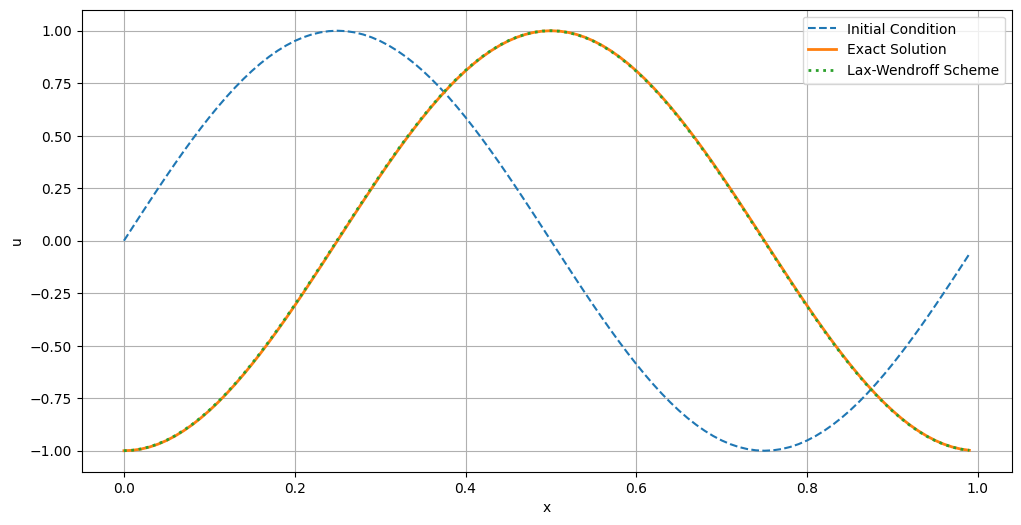

In [3]:
# Parameters
c = 1.0          # Advection speed
L = 1.0          # Domain length
T = 1.25         # Total time
nx = 100         # Number of spatial points
dx = L / nx      # Spatial step size
dt = 0.005       # Time step size
nt = int(T / dt) # Number of time steps

# Courant number
sigma = c * dt / dx
print(f"Courant number (sigma): {sigma}")

# Stability condition (for Lax-Wendroff, no strict CFL condition, but accuracy improves with sigma <=1)
if sigma > 1:
    warnings.warn(f"Courant number sigma = {sigma} > 1. Accuracy may decrease.")

# Spatial grid
x = np.linspace(0, L, nx, endpoint=False)
u_initial = np.sin(2 * np.pi * x)  # Initial condition: sinusoidal wave

# Initialize solution array
u = u_initial.copy()

# Time-stepping loop using Lax-Wendroff scheme
for n in range(nt):
    u_new = np.zeros_like(u)
    for i in range(nx):
        u_new[i] = (u[i]
                    - 0.5 * sigma    * (u[(i+1)%nx] -          u[(i-1)%nx])
                    + 0.5 * sigma**2 * (u[(i+1)%nx] - 2*u[i] + u[(i-1)%nx]))
    u = u_new

# Analytical solution
u_exact = np.sin(2 * np.pi * (x - c * T))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(x, u_initial, label='Initial Condition', linestyle='--')
plt.plot(x, u_exact,   label='Exact Solution', linewidth=2)
plt.plot(x, u,         label='Lax-Wendroff Scheme', linestyle=':', linewidth=2)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)

## Non-Dimensionalization and Key Dimensionless Numbers

Non-dimensionalization is a fundamental technique in the analysis of partial differential equations (PDEs) and fluid dynamics.
By converting variables and equations into dimensionless forms, researchers and engineers can simplify complex systems, identify dominant physical effects, and generalize solutions across different scales.
This section explores the purpose of non-dimensionalization, introduces key dimensionless numbers—Reynolds Number (Re), Mach Number (Ma), and Prandtl Number (Pr)—and discusses their applications and significance in various physical systems.

### Purpose of Non-Dimensionalization

Non-dimensionalization serves several critical purposes in the analysis and solution of PDEs:

1.  **Simplifying Equations for Analysis**

    By scaling variables and parameters, non-dimensionalization reduces the number of independent variables and parameters in the governing equations.
    This simplification often transforms complex, dimensional equations into a more manageable, dimensionless form.
    For instance, consider the non-dimensionalization of the Navier-Stokes equations:
    \begin{align}
    \frac{\partial \bar{\mathbf{u}}}{\partial \bar t} + (\bar{\mathbf{u}} \cdot \bar\nabla) \bar{\mathbf{u}} = -\bar\nabla \bar p + \frac{1}{\text{Re}} \bar\nabla^2 \bar{\mathbf{u}} + \bar{\mathbf{f}}
    \end{align}
    Here, the introduction of dimensionless variables $\bar{\mathbf{u}}$, $\bar t$, and $\bar p$ has reduced the complexity of the original equations by consolidating physical parameters into dimensionless groups like the Reynolds Number (Re).

2.  **Identifying Dominant Physical Effects in Specific Regimes**

    Non-dimensionalization reveals the relative importance of various physical phenomena within a system.
    By examining the dimensionless numbers that emerge from the process, one can determine which terms in the equations are significant and which can be neglected under certain conditions.
    This identification is crucial for developing approximate solutions and understanding the behavior of the system in different regimes.

    For example, in high Reynolds number flows (Re $\gg 1$), inertial forces dominate over viscous forces, simplifying the Navier-Stokes equations by reducing the influence of the viscous term.
    Conversely, in low Reynolds number flows (Re $\ll 1$), viscous forces are predominant, and inertial terms can often be neglected.

### Key Dimensionless Numbers

Several dimensionless numbers play pivotal roles in fluid dynamics and the study of PDEs.
Among the most important are the Reynolds Number (Re), Mach Number (Ma), and Prandtl Number (Pr).
Each of these numbers encapsulates the ratio of different physical effects, providing insight into the system's behavior.

#### Reynolds Number (Re): Ratio of Inertial to Viscous Forces

The Reynolds Number is defined as:
\begin{align}
\text{Re} = \frac{\rho U L}{\mu} = \frac{U L}{\nu}
\end{align}
where:
* $\rho$ is the fluid density,
* $U$ is a characteristic velocity,
* $L$ is a characteristic length scale,
* $\mu$ is the dynamic viscosity,
* $\nu = \mu / \rho$ is the kinematic viscosity.

**Physical Interpretation:**

Reynolds Number quantifies the relative significance of inertial forces (associated with the fluid's motion) to viscous forces (associated with the fluid's internal friction). A high Re indicates that inertial forces dominate, leading to turbulent flow, while a low Re suggests that viscous forces are more influential, resulting in laminar flow.

**Applications:**

* **Flow Regimes:** Determining whether a flow will be laminar or turbulent based on Re.
* **Scale Modeling:** Ensuring dynamic similarity in wind tunnel experiments by matching Re between models and real-world scenarios.
* **Astrophysical Flows:** In stellar interiors, high Re can lead to turbulent convection, influencing energy transport and stellar evolution.

#### Mach Number (Ma): Ratio of Flow Velocity to Speed of Sound

The Mach Number is defined as:
\begin{align}
\text{Ma} = \frac{U}{c}
\end{align}
where:
* $U$ is the characteristic flow velocity,
* $c$ is the speed of sound in the fluid.

**Physical Interpretation:**

Mach Number measures the compressibility effects in a flow. When Ma $< 1$, the flow is subsonic, and compressibility effects are negligible. When Ma $\approx 1$, the flow is transonic, and compressibility becomes significant. For Ma $> 1$, the flow is supersonic, and shock waves may form.

**Applications:**

* **Aerodynamics:** Designing aircraft and rockets by analyzing flow behavior at different Mach regimes.
* **Astrophysics:** Studying phenomena like shock waves in supernova explosions and supersonic jets from active galactic nuclei.
* **Explosive Events:** Understanding the propagation of shock waves generated by explosions.

#### Prandtl Number (Pr): Ratio of Momentum Diffusivity to Thermal Diffusivity

The Prandtl Number is defined as:
\begin{align}
\text{Pr} = \frac{\nu}{\alpha} = \frac{\mu / \rho}{k / (\rho c_p)} = \frac{c_p \mu}{k}
\end{align}
where:
* $\nu$ is the kinematic viscosity,
* $\alpha = \frac{k}{\rho c_p}$ is the thermal diffusivity,
* $k$ is the thermal conductivity,
* $c_p$ is the specific heat at constant pressure.

**Physical Interpretation:**

Prandtl Number compares the rate at which momentum diffuses through a fluid to the rate at which heat diffuses.
A low Pr indicates that heat diffuses rapidly compared to momentum, while a high Pr suggests that momentum diffuses more quickly than heat.

**Applications:**

* **Heat Transfer:** Designing heat exchangers and cooling systems by understanding the relative rates of heat and momentum transfer.
* **Boundary Layer Analysis:** Determining the thickness of thermal and velocity boundary layers in fluid flows.
* **Astrophysical Processes:** Modeling heat conduction in stellar atmospheres where Pr influences energy transport mechanisms.

### Applications of Dimensionless Numbers

Dimensionless numbers like Re, Ma, and Pr are instrumental in analyzing and predicting the behavior of physical systems across various domains:

1.  **Flow Control and Design**

    In engineering, these numbers guide the design of systems involving fluid flow.
    For example, ensuring that aircraft operate efficiently at desired Reynolds and Mach numbers is crucial for performance and safety.

2.  **Scale Modeling and Similitude**

  In experimental studies, ensuring that the dimensionless numbers of a model match those of the real system (dynamic similarity) allows for accurate predictions and validations of theoretical models through physical experiments.

3.  **Astrophysical Fluid Systems**

    In astrophysics, dimensionless numbers help in scaling and understanding fluid behaviors in vastly different environments:
    * **Stellar Convection:** High Reynolds numbers indicate turbulent convection currents within stars, affecting energy transport and mixing of stellar material.
    * **Accretion Disks:** Mach numbers determine the compressibility of gas in accretion disks around black holes, influencing the formation of shock waves and jet structures.
    * **Interstellar Medium:** Prandtl numbers aid in modeling the thermal and momentum diffusion in the diffuse interstellar gas, impacting star formation rates and the dynamics of molecular clouds.

### Historical Anecdote: Fermi's Estimation of Atomic Bomb Energy Release

One of the most illustrative examples of the power of non-dimensionalization and dimensional analysis in physics is Enrico Fermi's remarkable estimation of the energy released during the first atomic bomb test, known as the Trinity test, conducted on July 16, 1945.
This anecdote not only highlights Fermi's ingenuity but also demostrate the practical utility of dimensionless numbers and scaling laws in tackling complex, real-world problems with limited empirical data.

During World War II, the Manhattan Project was a top-secret initiative aimed at developing nuclear weapons.
As the project progressed, scientists faced the daunting challenge of predicting the yield of the atomic bombs they were designing.
Precise calculations were hindered by the lack of comprehensive empirical data, necessitating innovative approaches to estimate explosive power accurately.

Enrico Fermi, a renowned physicist known for his ability to make quick, accurate estimates with minimal data, was tasked with predicting the energy release of the impending Trinity test.
His method exemplified dimensional analysis—a technique that uses the fundamental dimensions (such as mass, length, and time) to derive relationships between physical quantities.

Fermi's estimation process involved the following steps:
1.  **Observing the Shock Wave:**
   After the detonation, Fermi and his colleagues observed the speed at which the shock wave propagated through the air. Let's denote this speed as $U$.

2.  **Estimating the Shock Wave Radius:**
    By timing how long it took for the shock wave to reach a certain distance from the explosion site, Fermi estimated the radius $L$ of the blast wave after a specific duration $t$.

3.  **Applying the Sedov-Taylor Scaling:**
    The Sedov-Taylor solution describes the propagation of a strong shock wave from a point explosion in a homogeneous medium.
    According to this theory, the energy $E$ of the explosion is related to the shock wave's speed $U$, radius $L$, and the density $\rho$ of the surrounding air by the following relationship:
     \begin{align}
     E \sim \rho U^2 L^3
     \end{align}
     This equation is derived by balancing the kinetic energy imparted to the air by the shock wave with the energy of the explosion.

4.  **Calculating the Energy:**
    By substituting the estimated values of $\rho$, $U$, and $L$ into the above equation, Fermi arrived at an approximate value for the energy $E$ released during the explosion.

There is an arXiv paper on [this topic](https://arxiv.org/abs/2103.05784).